In [ ]:
import numpy as np
import pandas as pd
import pickle

import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
%cd drive/MyDrive/IS4303/notebooks/new_cleaned

Intuition: recall is low with dataframe due to slight imbalance in target variable.

## Helper functions

In [ ]:
X_train = pd.read_csv('./4X_train.csv')
X_test = pd.read_csv('./4X_test.csv')
y_train = pd.read_csv('./4y_train.csv')
y_test = pd.read_csv('./4y_test.csv')
y_train = y_train['is_canceled']
y_test = y_test['is_canceled']

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve, auc, precision_score, recall_score, f1_score


def plot_preds(preds, probas, truth):
  auc_score = roc_auc_score(truth, probas)
  prec = precision_score(truth, preds)
  rec = recall_score(truth, preds)
  f1 = f1_score(truth, preds)
  print(f"AUC: {auc_score:.2f}\n")
  print(f'Precision: {prec:.2f}')
  print(f'Recall: {rec:.2f}')
  print(f"F1: {f1:.2f}\n")

  fpr, tpr, thresholds = roc_curve(truth, probas)
  roc_auc = auc(fpr, tpr)
  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=2, label='AUC = %0.2f' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('FPR')
  plt.ylabel('TPR')
  plt.title('ROC')
  plt.legend(loc="lower right")
  plt.show()

## Checking balance

In [ ]:
y_train.value_counts()

0    35670
1    15804
Name: is_canceled, dtype: int64

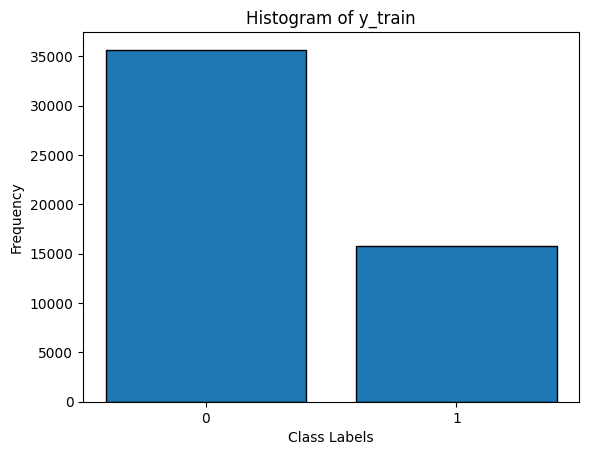

In [ ]:
plt.hist(y_train, bins=[-0.5, 0.5, 1.5], edgecolor='black', rwidth=0.8)
plt.xticks([0, 1])
plt.xlabel('Class Labels')
plt.ylabel('Frequency')
plt.title('Histogram of y_train')
plt.show()

AUC: 0.80

Precision: 0.67
Recall: 0.44
F1: 0.53



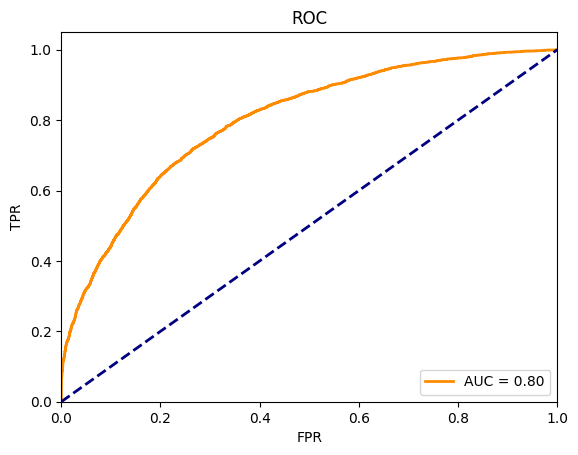

In [ ]:
# performance using unbalanced data
clf = LogisticRegression(max_iter=1000).fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:,1]
plot_preds(y_pred, y_pred_proba, y_test)

## SMOTE oversampling

In [ ]:
smote = SMOTE(random_state=123)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

AUC: 0.80

Precision: 0.54
Recall: 0.72
F1: 0.62



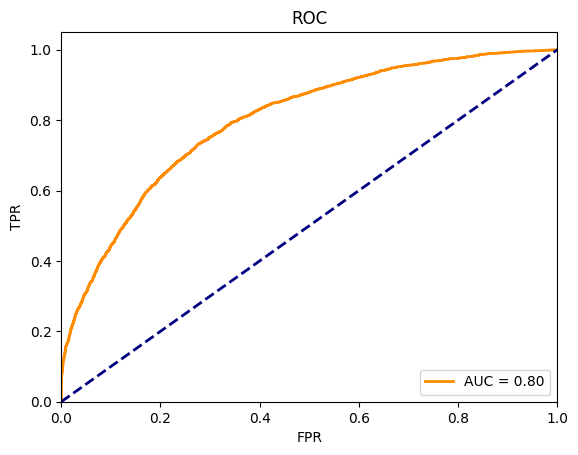

In [ ]:
clf = LogisticRegression(max_iter=1000).fit(X_train_resampled, y_train_resampled)
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:,1]
plot_preds(y_pred, y_pred_proba, y_test)

In [ ]:
y_train_resampled.value_counts()

0    35670
1    35670
Name: is_canceled, dtype: int64

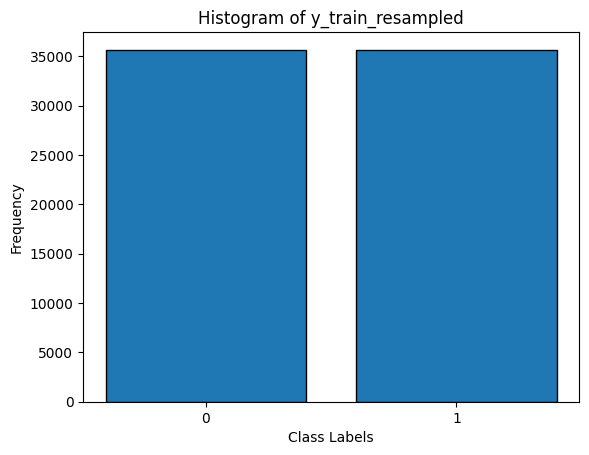

In [ ]:
plt.hist(y_train_resampled, bins=[-0.5, 0.5, 1.5], edgecolor='black', rwidth=0.8)
plt.xticks([0, 1])
plt.xlabel('Class Labels')
plt.ylabel('Frequency')
plt.title('Histogram of y_train_resampled')
plt.show()

## Saving

In [ ]:
X_train_resampled.to_csv('5X_train.csv', index=False)
y_train_resampled.to_csv('5y_train.csv', index=False)

In [ ]:
with open('SMOTE.pkl', 'wb') as file:
  pickle.dump(smote, file)

Not added to the preprocessing pipeline, due to the fact that SMOTE will never be used for incoming data or test data.

## Trying DT/ensemble to test non-linear
Out of curiosity

AUC: 0.67

Precision: 0.52
Recall: 0.59
F1: 0.55



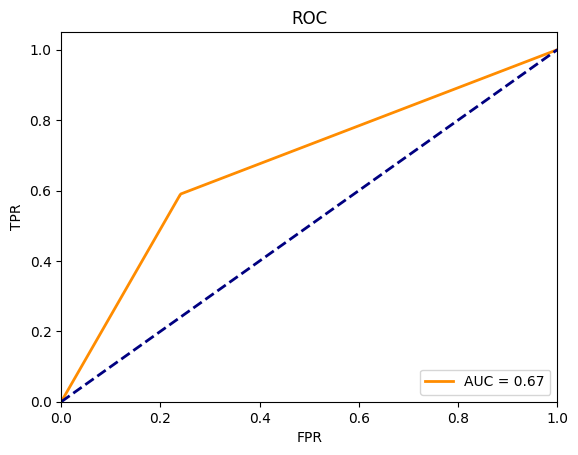

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train_resampled, y_train_resampled)
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:,1]
plot_preds(y_pred, y_pred_proba, y_test)

AUC: 0.67

Precision: 0.54
Recall: 0.56
F1: 0.55



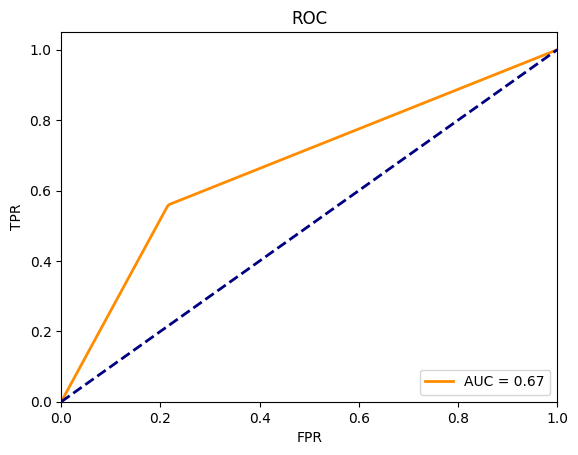

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:,1]
plot_preds(y_pred, y_pred_proba, y_test)

AUC: 0.84

Precision: 0.65
Recall: 0.65
F1: 0.65



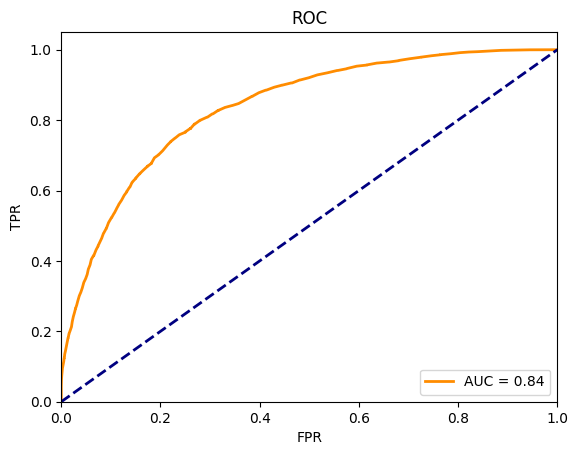

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier().fit(X_train_resampled, y_train_resampled)
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:,1]
plot_preds(y_pred, y_pred_proba, y_test)

AUC: 0.83

Precision: 0.71
Recall: 0.54
F1: 0.61



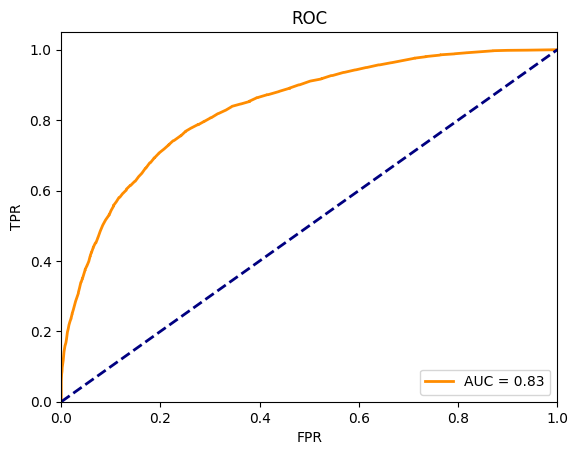

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier().fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:,1]
plot_preds(y_pred, y_pred_proba, y_test)